In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_boston

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
boston = load_boston()  

In [4]:
type(boston)

sklearn.utils.Bunch

In [5]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [6]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [8]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [9]:
boston.target.shape

(506,)

In [10]:
#Collect the input data into some variale data
data = boston.data
print(type(data))
data.shape

<class 'numpy.ndarray'>


(506, 13)

In [11]:
#Since the input is in the type of numpy ndarray convert it to pandas data frame
data = pd.DataFrame(data = data,columns = boston.feature_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
#We do not have price column(y) in data so we include that in dataframe
data['Price'] = boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## **Understanding data**

In [13]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [15]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

## **Data Visualization**

Creating a scatterplot matrix will allow us to visualize pair-wise relationships and correlations between different features

It is used to have a quick overview of how data is distributed and whether it contains outliers or not.

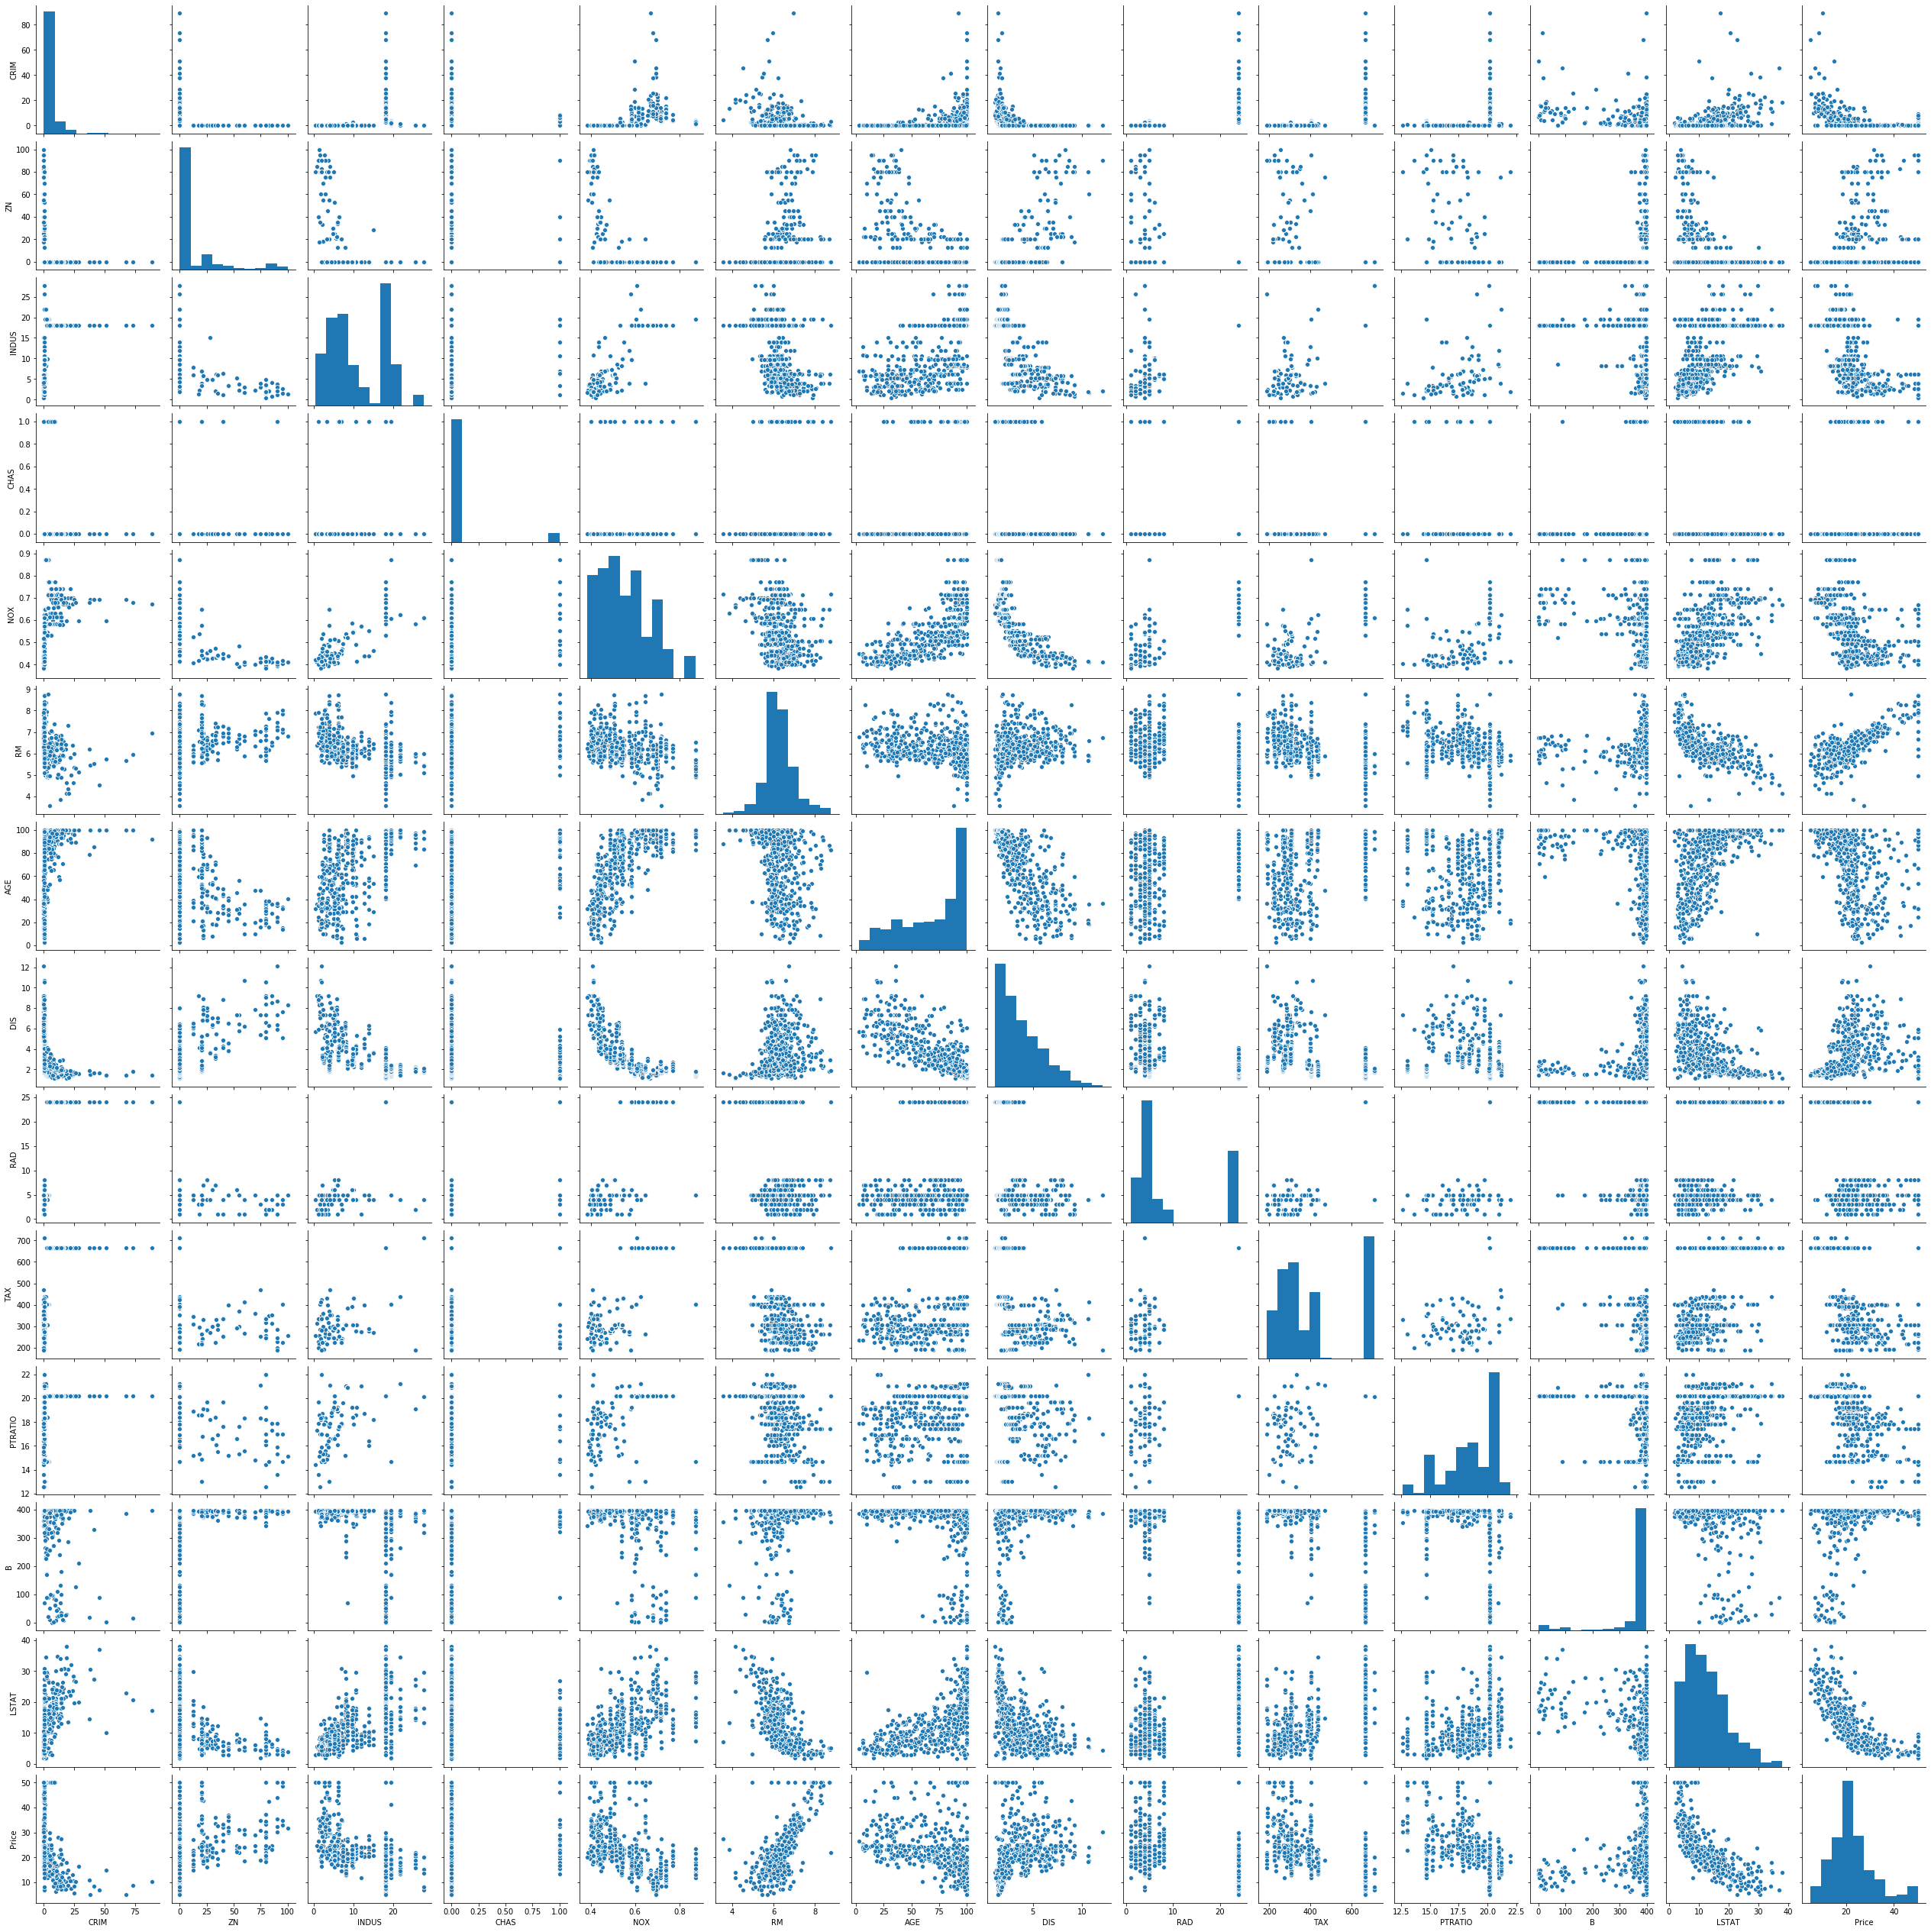

In [16]:
sns.pairplot(data)

**NOTE:**
  To explore these relations in a correlation manner, we can plot a correlation matric.Higher correlation shows there is high chance of predictability based on that features to the output. Before Correation matrix, we need to go for distribution plot becz if our feature is not well distributed then it might not help muuch in predicting the output


RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

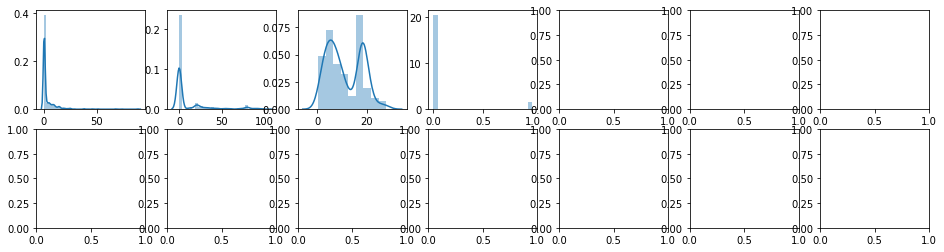

In [28]:
rows = 2
cols = 7

fig, ax = plt.subplots(nrows = rows, ncols = cols, figsize = (16,4))    # to visualize the distributions among the 14 columns in the data


col = data.columns       # to return list of columns from data
index = 0

for i in range(rows):
    for j in range(cols):
        sns.distplot(data[col[index]], ax = ax[i][j])       # for each grid we are going to plot the distribution of data in each columns in corresponding i,j grids
        index = index +1
plt.tight_layout()        #to avoid overlapping of subplots

**NOTE:**

If the distribution is normal then there is high chance of correlation with the output variable and if features are highly skewed then they wont affect the output much

**Creating Correlation Matrix**

Creating a correlation matrix helps us to quantify and summarize the relationships between the variables.

This correlation matrix is closely realted to covariance matrix.

It is a square matrix that contains the Person's r correaltion coefficient.

In [29]:
corrmat = data.corr()
corrmat

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


This correlation matric can be plotted with the help of heat map

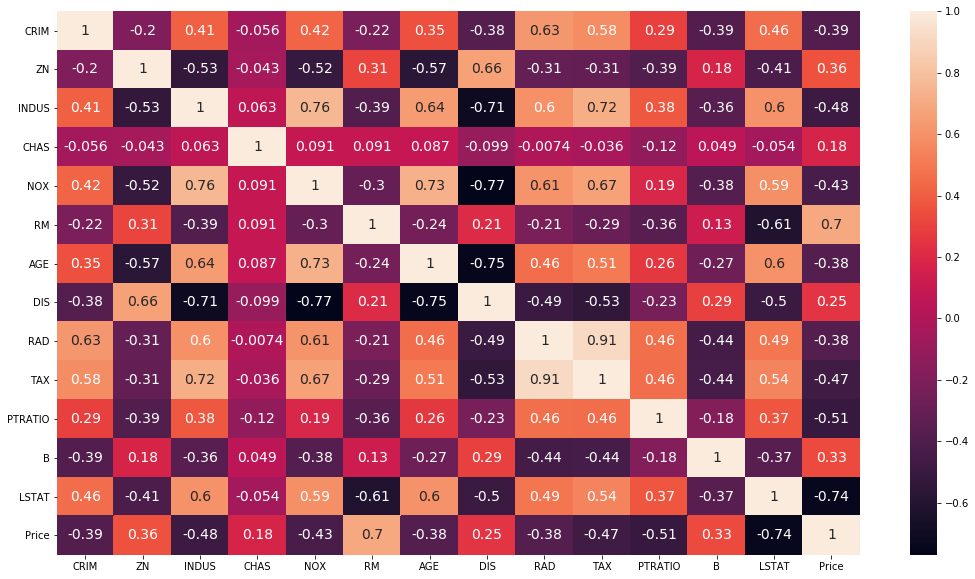

In [30]:
fig ,ax = plt.subplots(figsize = (18,10))
sns.heatmap(corrmat, annot = True, annot_kws =  {'size' : 14})

Now get those features with a gud correlation value

In [31]:
def getCorrelatedFeature(corrdata, threshold):
    feature = []
    value = []

    for i, index in enumerate(corrdata.index):
        if abs(corrdata[index])> threshold:
            feature.append(index)
            value.append(corrdata[index])
    
    df = pd.DataFrame(data = value, index = feature, columns = ['Corr Value'])
    return df 

In [32]:
threshold = 0.5
corr_value = getCorrelatedFeature(corrmat['Price'],threshold)
corr_value

,Corr Value
RM,0.695360
PTRATIO,-0.507787
LSTAT,-0.737663
Price,1.000000


Only these values are correlated with the output and hence we have to get the data for these columns alone to make precise prediction

In [33]:
corr_value.index.values

array(['RM', 'PTRATIO', 'LSTAT', 'Price'], dtype=object)

In [34]:
correlated_data = data[corr_value.index]
correlated_data.head()

,RM,PTRATIO,LSTAT,Price
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2


# **Pairplot and Corrmat of correlated data**

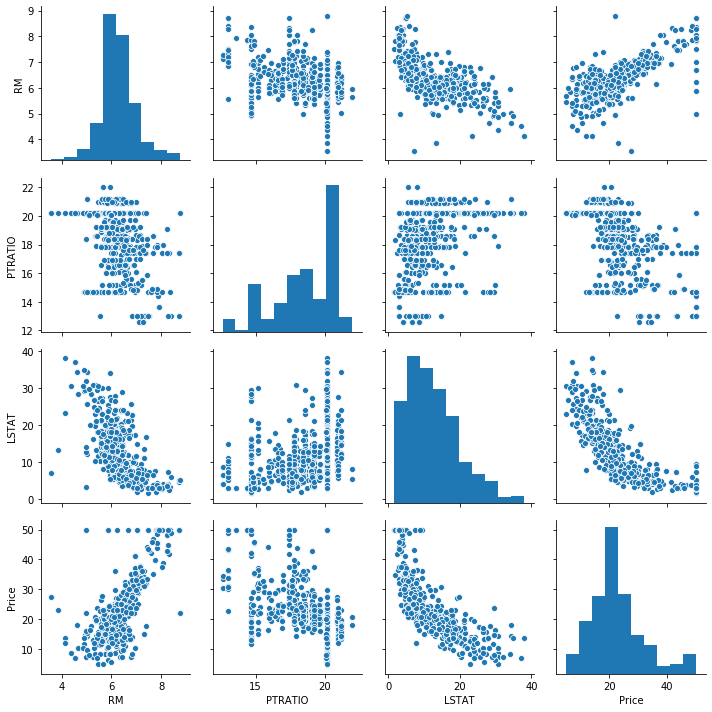

In [35]:
sns.pairplot(correlated_data)
plt.tight_layout()

Now on visualizing we can see that the selected features are correlated

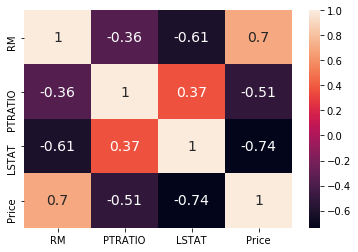

In [36]:
sns.heatmap(correlated_data.corr(),annot = True, annot_kws = {'size':14})

# **Shuffle and split the data**

In [37]:
X = correlated_data.drop(labels = ['Price'], axis = 1)
y = correlated_data['Price']
X.head()

,RM,PTRATIO,LSTAT
0,6.575,15.3,4.98
1,6.421,17.8,9.14
2,7.185,17.8,4.03
3,6.998,18.7,2.94
4,7.147,18.7,5.33


In [38]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [39]:
X_train.shape, y_train.shape ,X_test.shape, y_test.shape

((404, 3), (404,), (102, 3), (102,))

# **Lets train our model**

In [40]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
y_predict = model.predict(X_test)

Let's see how far both are similar

In [42]:
df = pd.DataFrame(data = [y_predict,y_test])
df.T

,0,1
0,27.609031,22.6
1,22.099034,50.0
2,26.529255,23.0
3,12.507986,8.3
4,22.254879,21.2
...,...,...
97,28.271228,24.7
98,18.467419,14.1
99,18.558070,18.7
100,24.681964,28.1


## **Evaluation: Defining performance metrics**

file:///home/vishwa/Pictures/Screenshot%20from%202020-07-15%2000-51-24.png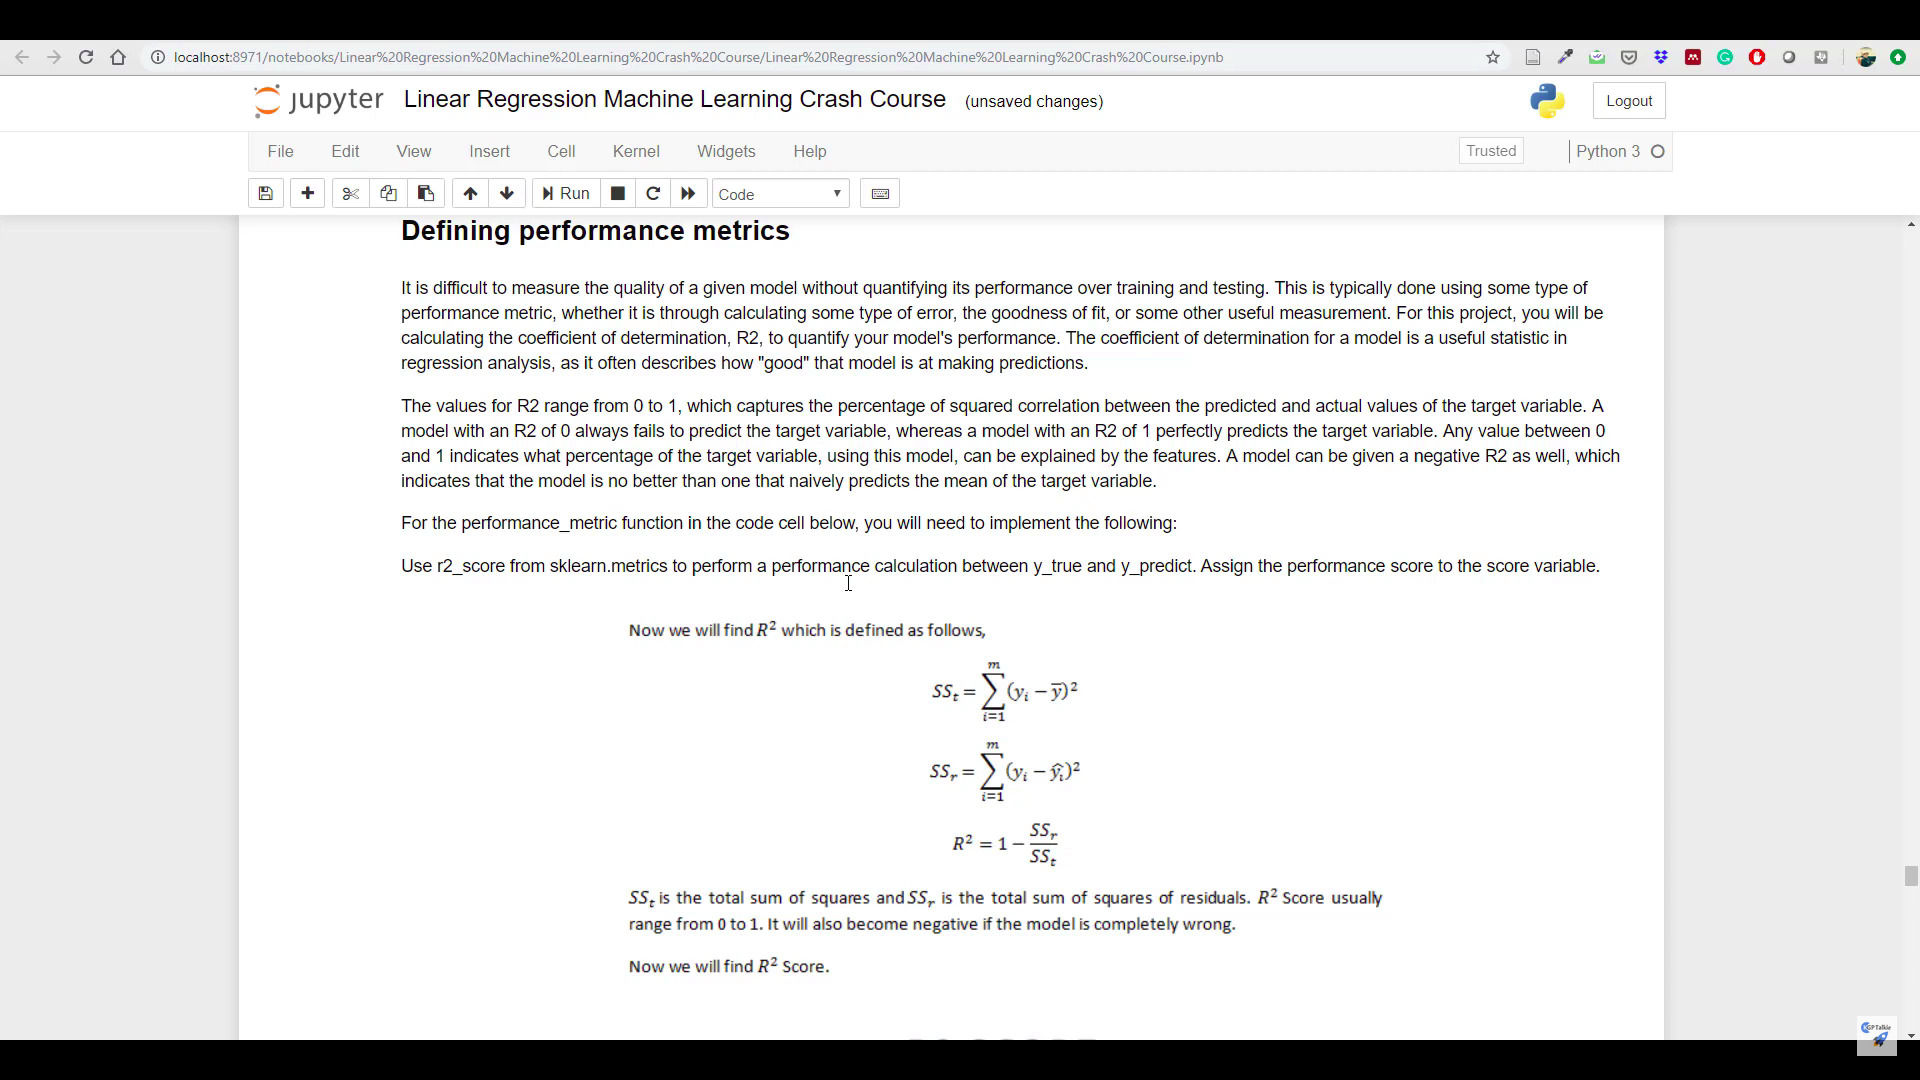

In [43]:
from sklearn.metrics import r2_score

In [44]:
score = r2_score(y_test,y_predict)
mae = mean_absolute_error(y_test,y_predict)
mse = mean_squared_error(y_test,y_predict)


print('r2_score: ',score)
print('mae: ',mae)
print('mse: ',mse)

r2_score:  0.4881642015692508
mae:  4.404434993909256
mse:  41.67799012221682


# **Store Feature performance to pandas dataframe**

This is to make a comparison between models by taking some other set of features

In [45]:
total_features = []
total_features_name = []
selected_correlation_value = []
r2_scores = []
mae_score = []
mse_score = []

Method to calculate model metrics

In [46]:
def performance_metrics(features, th , y_true, y_pred):
    score = r2_score(y_true, y_pred) 
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    
    total_features.append(len(features)-1)          #-1 becz price also will be there in features
    total_features_name.append(str(features))
    selected_correlation_value.append(th)
    r2_scores.append(score)
    mae_score.append(mae)
    mse_score.append(mse)

    #creating a pandas dataframe for better visualising of metrics
    metrics_dataframe = pd.DataFrame(data = [total_features_name, total_features, selected_correlation_value, r2_scores, mae_score, mse_score],
                                     index = ['features name','#feature','corr_value','r2_score','MAE','MSE'])
                                
    return metrics_dataframe.T

In [47]:
performance_metrics(correlated_data.columns.values, threshold, y_test, y_predict)

,features name,#feature,corr_value,r2_score,MAE,MSE
0,['RM' 'PTRATIO' 'LSTAT' 'Price'],3,0.5,0.488164,4.40443,41.678


# **Regression plot of the features correlated with the House Price**

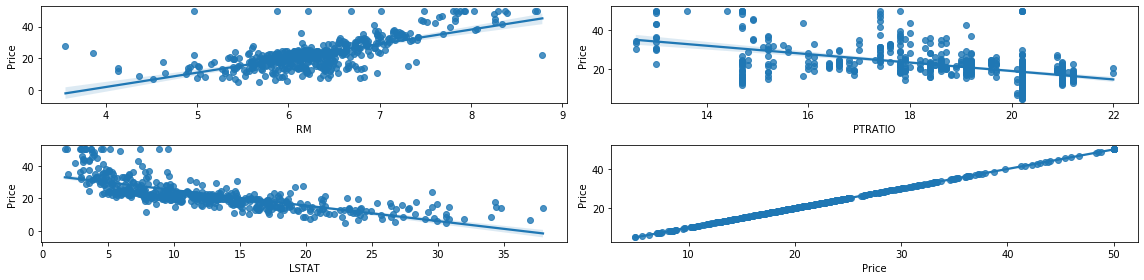

In [48]:
rows = 2
cols = 2

fig, ax = plt.subplots(nrows = rows, ncols = cols, figsize = (16,4))

col = correlated_data.columns
index = 0

for i in range(rows):
    for j in range(cols):
        sns.regplot(x = correlated_data[col[index]], y = correlated_data['Price'], ax = ax[i][j])
        index = index+1
fig.tight_layout()

# **Let's find out other combinations of columns to get better accuracy  with >60%**

In [49]:
corrmat['Price']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
Price      1.000000
Name: Price, dtype: float64

In [50]:
threshold = 0.6
corr_value = getCorrelatedFeature(corrmat['Price'],threshold)
corr_value

,Corr Value
RM,0.695360
LSTAT,-0.737663
Price,1.000000


In [51]:
correlated_data = data[corr_value.index]
correlated_data.head()

,RM,LSTAT,Price
0,6.575,4.98,24.0
1,6.421,9.14,21.6
2,7.185,4.03,34.7
3,6.998,2.94,33.4
4,7.147,5.33,36.2


In [52]:
def getY_predict(corrdata):
    X = corrdata.drop(labels = ['Price'],axis = 1)
    y = corrdata['Price']

    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

    model = LinearRegression()
    model.fit(X_train,y_train)
    y_predict = model.predict(X_test)

    return y_predict  

In [53]:
y_predict = getY_predict(correlated_data)
threshold

0.6

In [54]:
performance_metrics(correlated_data.columns.values, threshold, y_test,y_predict)

,features name,#feature,corr_value,r2_score,MAE,MSE
0,['RM' 'PTRATIO' 'LSTAT' 'Price'],3,0.5,0.488164,4.40443,41.678
1,['RM' 'LSTAT' 'Price'],2,0.6,0.540908,4.14244,37.3831


## **Let's find out other combinations of columns to get better accuracy  with >60%**

In [55]:
corrmat['Price']


CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
Price      1.000000
Name: Price, dtype: float64

In [56]:
threshold = 0.7
corr_value = getCorrelatedFeature(corrmat['Price'],threshold)
corr_value

,Corr Value
LSTAT,-0.737663
Price,1.000000


In [57]:
correlated_data = data[corr_value.index]
correlated_data.head()

,LSTAT,Price
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [58]:
y_predict = getY_predict(correlated_data)
performance_metrics(correlated_data.columns.values, threshold, y_test, y_predict)

,features name,#feature,corr_value,r2_score,MAE,MSE
0,['RM' 'PTRATIO' 'LSTAT' 'Price'],3,0.5,0.488164,4.40443,41.678
1,['RM' 'LSTAT' 'Price'],2,0.6,0.540908,4.14244,37.3831
2,['LSTAT' 'Price'],1,0.7,0.430957,4.86401,46.3363


# **Lets go ahead and select only RM feature**

In [59]:
correlated_data = data[['RM','Price']] 
correlated_data.head()

,RM,Price
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2


In [60]:
y_predict = getY_predict(correlated_data)
performance_metrics(correlated_data.columns.values, threshold, y_test, y_predict)

,features name,#feature,corr_value,r2_score,MAE,MSE
0,['RM' 'PTRATIO' 'LSTAT' 'Price'],3,0.5,0.488164,4.40443,41.678
1,['RM' 'LSTAT' 'Price'],2,0.6,0.540908,4.14244,37.3831
2,['LSTAT' 'Price'],1,0.7,0.430957,4.86401,46.3363
3,['RM' 'Price'],1,0.7,0.423944,4.32474,46.9074


## **Let's find out other combinations of columns to get better accuracy  with >40%**

In [61]:
threshold = 0.4
corr_value = getCorrelatedFeature(corrmat['Price'],threshold)
corr_value

,Corr Value
INDUS,-0.483725
NOX,-0.427321
RM,0.695360
TAX,-0.468536
PTRATIO,-0.507787
LSTAT,-0.737663
Price,1.000000


In [62]:
correlated_data = data[corr_value.index]
correlated_data.head()

,INDUS,NOX,RM,TAX,PTRATIO,LSTAT,Price
0,2.31,0.538,6.575,296.0,15.3,4.98,24.0
1,7.07,0.469,6.421,242.0,17.8,9.14,21.6
2,7.07,0.469,7.185,242.0,17.8,4.03,34.7
3,2.18,0.458,6.998,222.0,18.7,2.94,33.4
4,2.18,0.458,7.147,222.0,18.7,5.33,36.2


In [63]:
y_predict = getY_predict(correlated_data)
performance_metrics(correlated_data.columns.values, threshold, y_test, y_predict)

,features name,#feature,corr_value,r2_score,MAE,MSE
0,['RM' 'PTRATIO' 'LSTAT' 'Price'],3,0.5,0.488164,4.40443,41.678
1,['RM' 'LSTAT' 'Price'],2,0.6,0.540908,4.14244,37.3831
2,['LSTAT' 'Price'],1,0.7,0.430957,4.86401,46.3363
3,['RM' 'Price'],1,0.7,0.423944,4.32474,46.9074
4,['INDUS' 'NOX' 'RM' 'TAX' 'PTRATIO' 'LSTAT' 'P...,6,0.4,0.476203,4.3945,42.6519


## **Normalization and Standardization**

In [64]:
model = LinearRegression(normalize = True)
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [65]:
y_predict = model.predict(X_test)
r2_score(y_test, y_predict)

0.4881642015692508

## **Learning Curves**

In [66]:
from sklearn.model_selection import learning_curve
